In [1]:
from keras.models import load_model
from keras.utils import plot_model

import os

root = '.'
dataset_dir = os.path.join(root, 'generated', 'ssd_samples_6')

Using TensorFlow backend.


In [2]:
"""
Load SSD model
"""
from ssd_tools.keras_layers.keras_layer_AnchorBoxes import AnchorBoxes
from ssd_tools.keras_loss_function.keras_ssd_loss import SSDLoss

ssd_loss = SSDLoss(neg_pos_ratio=3, alpha=1.0)
ssd_model = load_model(os.path.join(dataset_dir, 'plate_ssd7_epoch-20_loss-0.7405_val_loss-0.3513.h5'), custom_objects={
    'AnchorBoxes': AnchorBoxes,
    'compute_loss': ssd_loss.compute_loss
})

In [3]:
"""
Load Extractor Model
"""

from keras import backend as K
from keras import losses

from keras.engine.saving import model_from_json

label_helper = {'m_s1': slice(0, 3), 
                's1_1': slice(3, 30),
                's1_2': slice(30, 57),
                'm_s2': slice(57, 62),
                's2_1': slice(62, 73), 
                's2_2': slice(73, 84), 
                's2_3': slice(84, 95),
                's2_4': slice(95, 106),
                'm_s3': slice(106, 110), 
                's3_1': slice(110, 137),
                's3_2': slice(137, 164), 
                's3_3': slice(164, 191)}

def plate_loss(y_true, y_pred):
    loss_s1_0 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['m_s1']], y_pred[:, label_helper['m_s1']]))
    loss_s1_1 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s1_1']], y_pred[:, label_helper['s1_1']]))
    loss_s1_2 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s1_2']], y_pred[:, label_helper['s1_2']]))
    
    loss_s2_0 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['m_s2']], y_pred[:, label_helper['m_s2']]))
    loss_s2_1 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_1']], y_pred[:, label_helper['s2_1']]))
    loss_s2_2 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_2']], y_pred[:, label_helper['s2_2']]))
    loss_s2_3 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_3']], y_pred[:, label_helper['s2_3']]))
    loss_s2_4 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_4']], y_pred[:, label_helper['s2_4']]))
    
    loss_s3_0 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['m_s3']], y_pred[:, label_helper['m_s3']]))
    loss_s3_1 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s3_1']], y_pred[:, label_helper['s3_1']]))
    loss_s3_2 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s3_2']], y_pred[:, label_helper['s3_2']]))
    loss_s3_3 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s3_3']], y_pred[:, label_helper['s3_3']]))
    
    loss_s1 = loss_s1_0 + loss_s1_1 + loss_s1_2
    loss_s2 = loss_s2_0 + loss_s2_1 + loss_s2_2 + loss_s2_3 + loss_s2_4
    loss_s3 = loss_s3_0 + loss_s3_1 + loss_s3_2 + loss_s3_3
    return loss_s1 + loss_s2 + loss_s3

losses.plate_loss = plate_loss

extractor_dir = os.path.join(root, 'generated', 'create_sample_extractor3_1')
json_file = open(os.path.join(extractor_dir, 'modelz2.json'), 'r')
extractor_model_json = json_file.read()
json_file.close()
extractor_model = model_from_json(extractor_model_json)
# load weights into new model
extractor_model.load_weights(os.path.join(extractor_dir, "extractorz2_epoch-76_loss-0.9559_val_loss-2.1267.h5"))

In [4]:
"""
Extractor decoder
"""

"""
Label Decoder
"""

label_helper = {'m_s1': slice(0, 3), 
                's1_1': slice(3, 30),
                's1_2': slice(30, 57),
                'm_s2': slice(57, 62),
                's2_1': slice(62, 73), 
                's2_2': slice(73, 84), 
                's2_3': slice(84, 95),
                's2_4': slice(95, 106),
                'm_s3': slice(106, 110), 
                's3_1': slice(110, 137),
                's3_2': slice(137, 164), 
                's3_3': slice(164, 191)}

def extractor_logits_decoder(label):
    # Convert label to readable character
    s1_0 = label[0:3]
    s1_1 = label[3:30]
    s1_2 = label[30:57]
    
    s2_0 = label[57:62]
    s2_1 = label[62:73]
    s2_2 = label[73:84]
    s2_3 = label[84:95]
    s2_4 = label[95:106]
    
    s3_0 = label[106:110]
    s3_1 = label[110:137]
    s3_2 = label[137:164]
    s3_3 = label[164:191]
    
    s1_0 = np.argmax(s1_0)
    s1_1 = np.argmax(s1_1)
    s1_2 = np.argmax(s1_2)
    
    s2_0 = np.argmax(s2_0)
    s2_1 = np.argmax(s2_1)
    s2_2 = np.argmax(s2_2)
    s2_3 = np.argmax(s2_3)
    s2_4 = np.argmax(s2_4)
    
    s3_0 = np.argmax(s3_0)
    s3_1 = np.argmax(s3_1)
    s3_2 = np.argmax(s3_2)
    s3_3 = np.argmax(s3_3)
    
    s1 = [s1_0, s1_1, s1_2]
    s2 = [s2_0, s2_1, s2_2, s2_3, s2_4]
    s3 = [s3_0, s3_1, s3_2, s3_3]
    return s1, s2, s3


def extractor_label_decoder(s1, s2, s3):
    """
    Label Decoder
    Output real value from the label
    e.g 'AE 2343 PY'
    """
    
    CHAR_DICT = " ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    NUMBER_DICT = " 0123456789"
    
    s1 = CHAR_DICT[s1[1]] + CHAR_DICT[s1[2]]
    s2 = NUMBER_DICT[s2[1]] + NUMBER_DICT[s2[2]] + NUMBER_DICT[s2[3]] + NUMBER_DICT[s2[4]]
    s3 = CHAR_DICT[s3[1]] + CHAR_DICT[s3[2]] + CHAR_DICT[s3[3]]
    # model.summary()
    return s1 + ' ' + s2 + ' ' + s3  



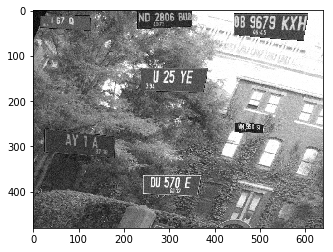

In [6]:
"""
Prepare inference
"""
import cv2 as cv2
from matplotlib import pyplot as plt
import numpy as np

img_dir = os.path.join(dataset_dir, 'dataset1')

img_filename = os.listdir(img_dir)

img = cv2.imread(os.path.join(img_dir, img_filename[12]))
plt.imshow(img)
plt.show()

In [8]:
"""
Testing Do Inference
"""
from ssd_tools.ssd_encoder_decoder.ssd_output_decoder import decode_detections

i = 13
img = cv2.imread(os.path.join(img_dir, img_filename[i]))
img = np.expand_dims(img, 0)
output = ssd_model.predict(img)
decoded_output = decode_detections(output, 
                                   confidence_thresh=0.8,
                                   iou_threshold=0.2,
                                   top_k=100,
                                   normalize_coords=True,
                                   img_height=480,
                                   img_width=640)
decoded_output[0]
# img.shape

array([[  1.        ,   0.99999845, 443.92982483, 140.41560173,
        580.2922821 , 189.8652935 ],
       [  1.        ,   0.99998891,  27.76355267,  21.78224623,
        164.4004631 ,  75.53668499],
       [  1.        ,   0.99997604,  23.53829384, 363.41348648,
        141.34350777, 399.07316208],
       [  1.        ,   0.99995625,  32.66824722, 135.08621693,
        176.07940674, 181.92576885],
       [  1.        ,   0.99983108,  12.38219261, 250.57479858,
        129.43049431, 295.89700699],
       [  1.        ,   0.99491322, 470.99708557, 248.59542847,
        557.5982666 , 282.3997879 ],
       [  1.        ,   0.99393129, 264.56777573, 255.77562332,
        336.9537735 , 281.9203949 ]])

In [9]:
"""
Show the result
"""
import sys

font = cv2.FONT_HERSHEY_SIMPLEX
print('clean')
color = (255, 0, 0)

video = cv2.VideoCapture(0)
while True:
    ret, frame = video.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)
    # frame = img[0]
    frame = np.array(frame)
    # frame = cv2.resize(frame, (640, 480))
    input_frame = np.expand_dims(frame, 0)
    # First model detect with SSD
    ssd_output = ssd_model.predict(input_frame)
    ssd_output = decode_detections(ssd_output, 
                                   confidence_thresh=0.8,
                                   iou_threshold=0.2,
                                   top_k=100,
                                   normalize_coords=True,
                                   img_height=480,
                                   img_width=640)
    for box in ssd_output[0]:
        x1 = int(box[-4])
        y1 = int(box[-3])
        x2 = int(box[-2])
        y2 = int(box[-1])
        # Prepare image for extractor model
        # print('1.', str(frame.shape))
        extractor_input = frame[y1:y2, x1:x2, :]
        # print('2.', str(extractor_input.shape))
        extractor_input = cv2.resize(extractor_input, (200, 61))
        extractor_input = np.expand_dims(extractor_input, 0)
        # Second model extract the plate number
        extractor_output = extractor_model.predict(extractor_input)
        s1, s2, s3 = extractor_logits_decoder(extractor_output[0])
        result = extractor_label_decoder(s1, s2, s3)
        # Put text and draw boxes
        cv2.putText(frame, str(result.replace(" ", "")), (x1, y2), font, 0.5, color, 1, cv2.LINE_AA)
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
    # Show the image    
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) == ord('q'):    
        video.release()
        cv2.destroyAllWindows()
        sys.exit()


clean


SystemExit: 

/home/satya/anaconda3/envs/skripsi/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [26]:
"""
Get single photos then process it
"""
import cv2 as cv2 
import sys
font = cv2.FONT_HERSHEY_SIMPLEX
print('clean')
color = (255, 0, 0)

video = cv2.VideoCapture(0)
while True:
    ret, frame = video.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)
    frame = cv2.resize(frame, (640, 480))
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        video.release()
        cv2.destroyAllWindows()
        sys.exit()


clean


SystemExit: 

In [4]:
frame.shape

(480, 640, 3)

In [5]:
%tb

SystemExit: 